#  (2) Part 2: Geospatial Analysis with GeoPandas: Task 3

EPSG:4326
     IDDPTO DEPARTAMEN IDPROV      PROVINCIA  IDDIST                DISTRITO  \
0        10    HUANUCO   1009    PUERTO INCA  100902         CODO DEL POZUZO   
1        10    HUANUCO   1009    PUERTO INCA  100904             TOURNAVISTA   
2        25    UCAYALI   2503     PADRE ABAD  250305  ALEXANDER VON HUMBOLDT   
3        25    UCAYALI   2503     PADRE ABAD  250302                 IRAZOLA   
4        25    UCAYALI   2503     PADRE ABAD  250304                 NESHUYA   
...     ...        ...    ...            ...     ...                     ...   
1868     10    HUANUCO   1006  LEONCIO PRADO  100608         CASTILLO GRANDE   
1869     10    HUANUCO   1006  LEONCIO PRADO  100609            PUEBLO NUEVO   
1870     10    HUANUCO   1006  LEONCIO PRADO  100610   SANTO DOMINGO DE ANDA   
1871     21       PUNO   2111      SAN ROMAN  211105              SAN MIGUEL   
1872     15       LIMA   1508         HUAURA  150806                  HUAURA   

                     CAPITAL 

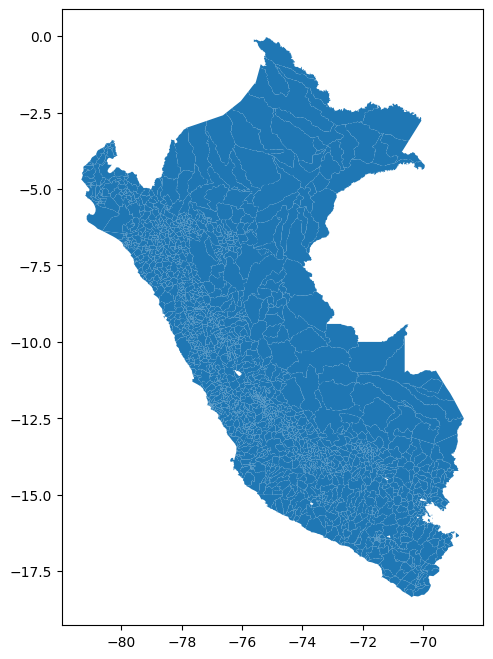

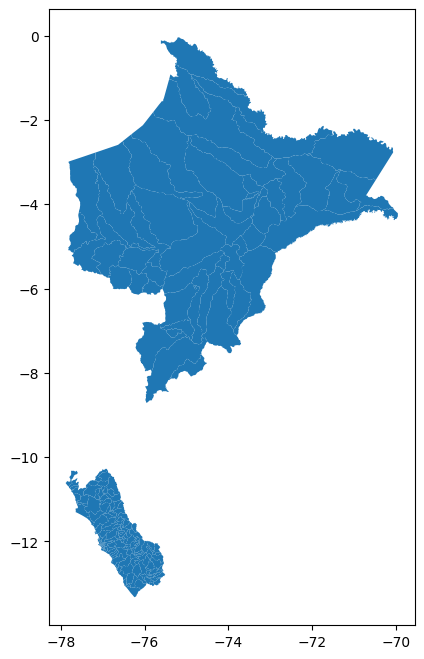

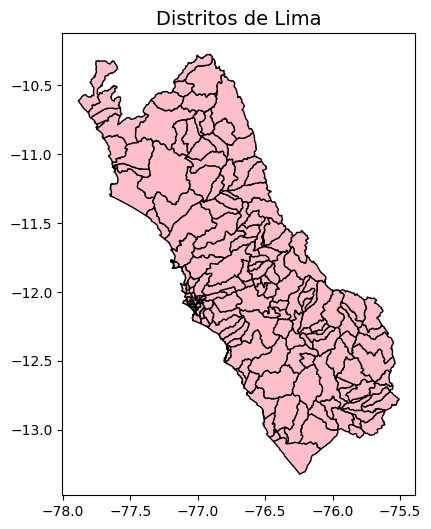

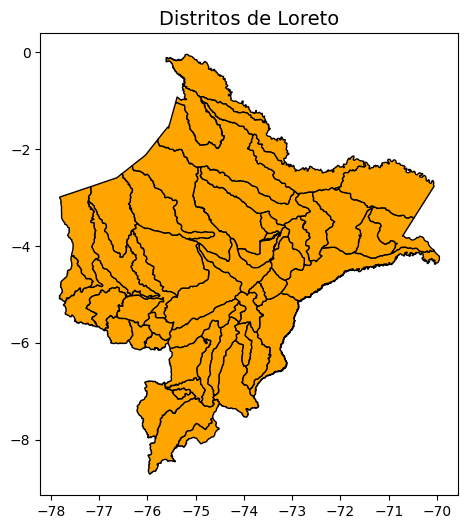

EPSG:4326
        OBJECTID         NOM_POBLAD FUENTE      CÓDIGO CAT_POBLAD        DIST  \
0              1         PANDISHARI   INEI  2502010002      OTROS    RAYMONDI   
1              2            CHICOSA   INEI  2502010003      OTROS    RAYMONDI   
2              3               RAYA    IGN  2502010004      OTROS    RAYMONDI   
3              4        PENSILVANIA   INEI  2502010005      OTROS    RAYMONDI   
4              5        PONTE VEDRA   INEI  2502010006    CASERÍO    RAYMONDI   
...          ...                ...    ...         ...        ...         ...   
136582    136584               IPAN   INEI        None       None    ZORRITOS   
136583    136585              URBAN   INEI        None       None    ZORRITOS   
136584    136586  PAJONAL MAJONTONI    IGN        None       None    RAYMONDI   
136585    136587        AGUA BLANCA   INEI  2501020043    CASERÍO  CAMPOVERDE   
136586    136588          PRIMAVERA   INEI  2503020032    CASERÍO     IRAZOLA   

                 

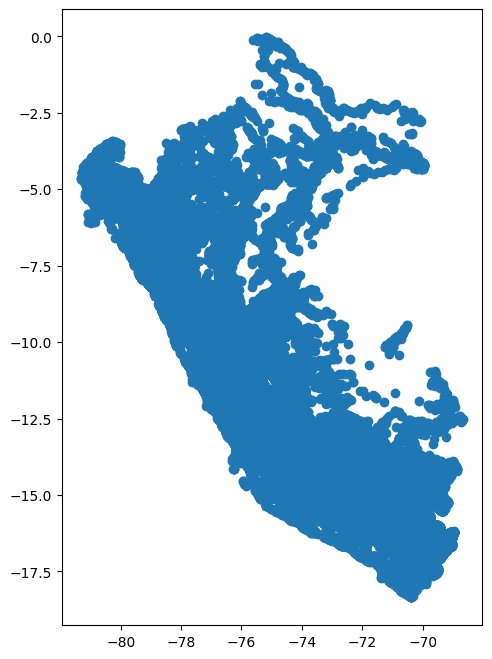

Centroides en Lima: 7615
Centroides en Loreto: 3447


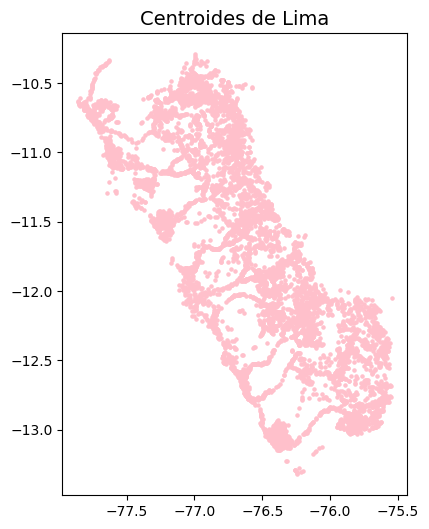

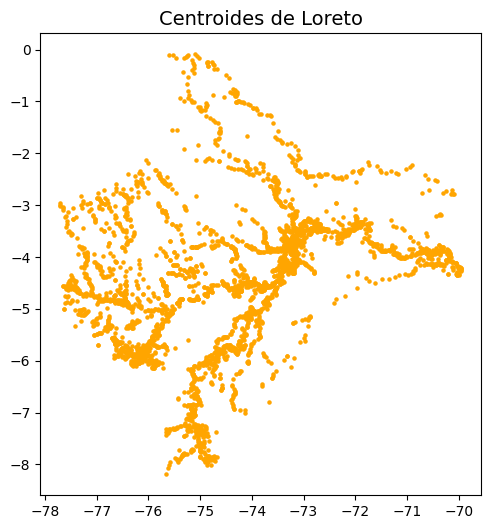

Centroides originales: 136587
Centroides en Lima: 7610


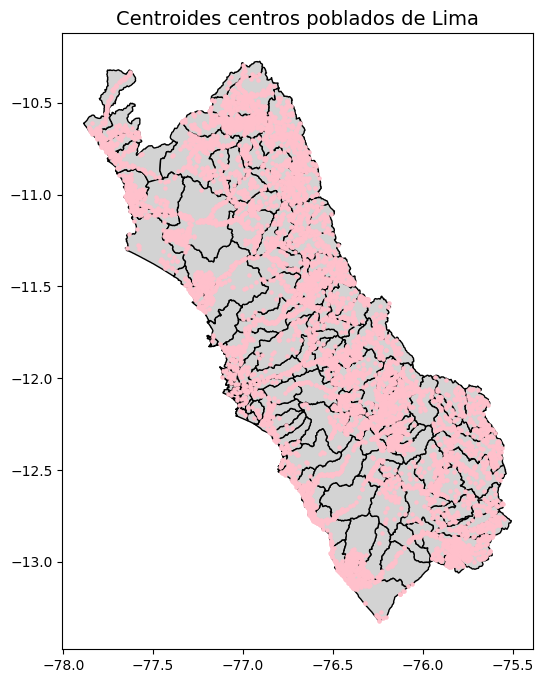

Centroides originales: 136587
Centroides en Loreto: 3426


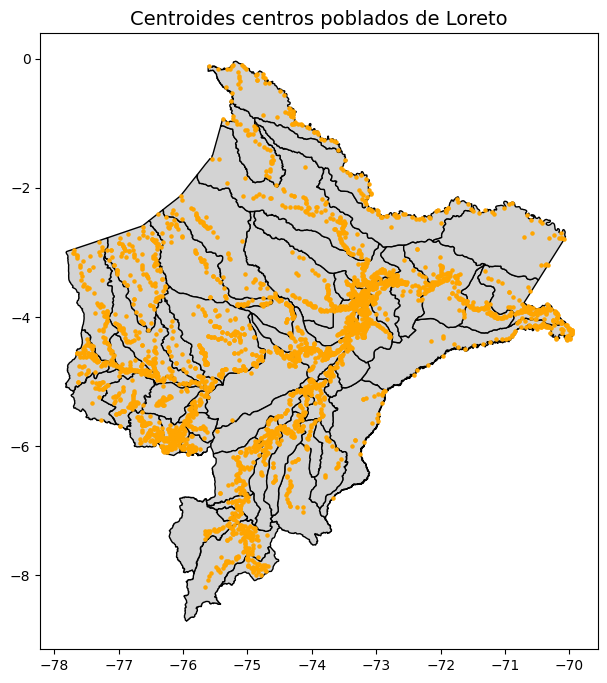

             Institución  Código Único  \
0                PRIVADO         16618   
1      GOBIERNO REGIONAL          7050   
2      GOBIERNO REGIONAL            99   
3                PRIVADO         19555   
4                   OTRO         18792   
...                  ...           ...   
20814  GOBIERNO REGIONAL          2283   
20815  GOBIERNO REGIONAL          2278   
20816  GOBIERNO REGIONAL          2274   
20817  GOBIERNO REGIONAL          2272   
20818  GOBIERNO REGIONAL           704   

                              Nombre del establecimiento  \
0                                             SONRIE MAS   
1                                                 AMBATO   
2                              SANTA ISABEL DE YUMBATURO   
3                                           DENTOCAPLINA   
4                              MEDICO DE FAMILIA MANTARA   
...                                                  ...   
20814                               P.S NUEVO HUALAPAMPA   
20815          

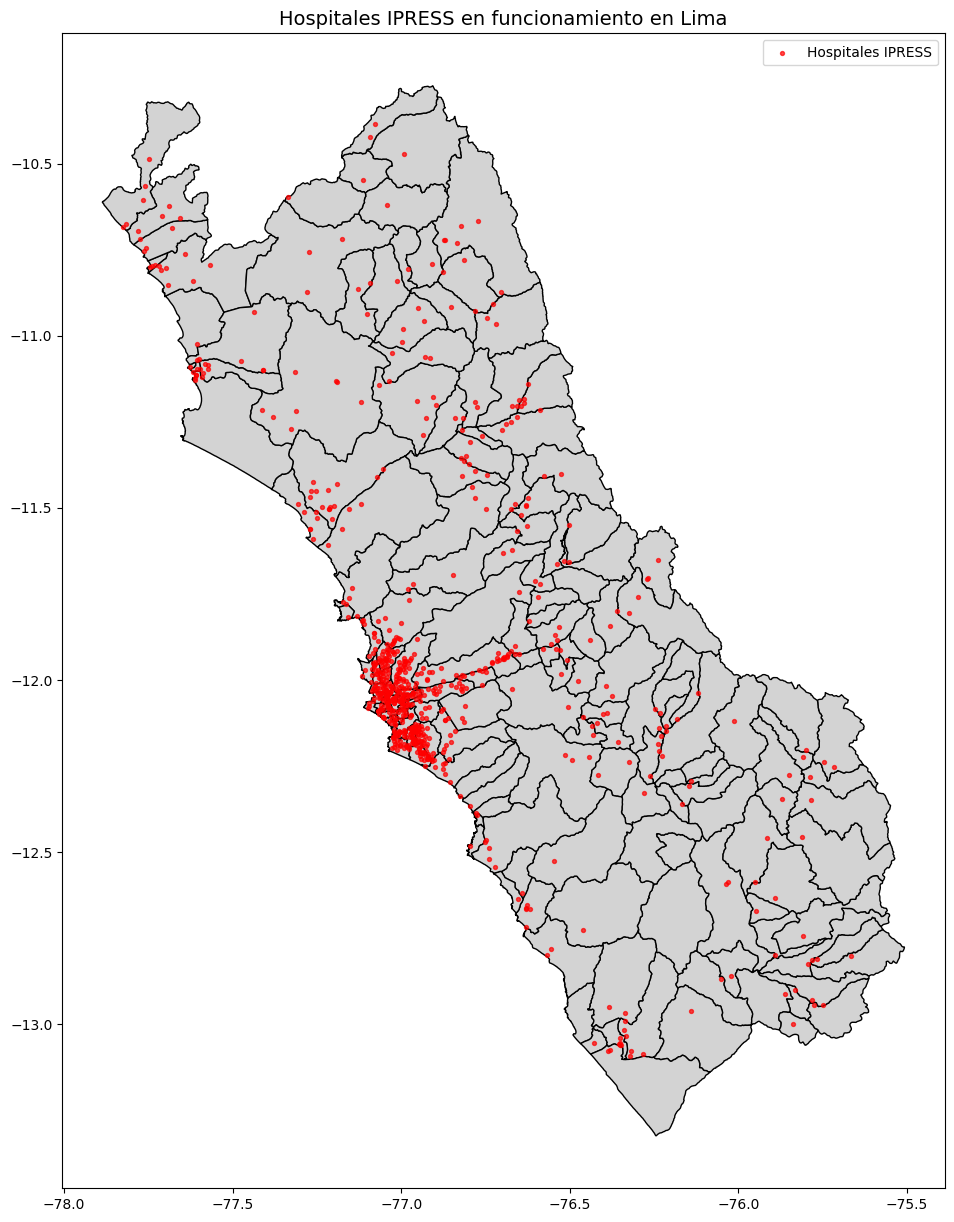

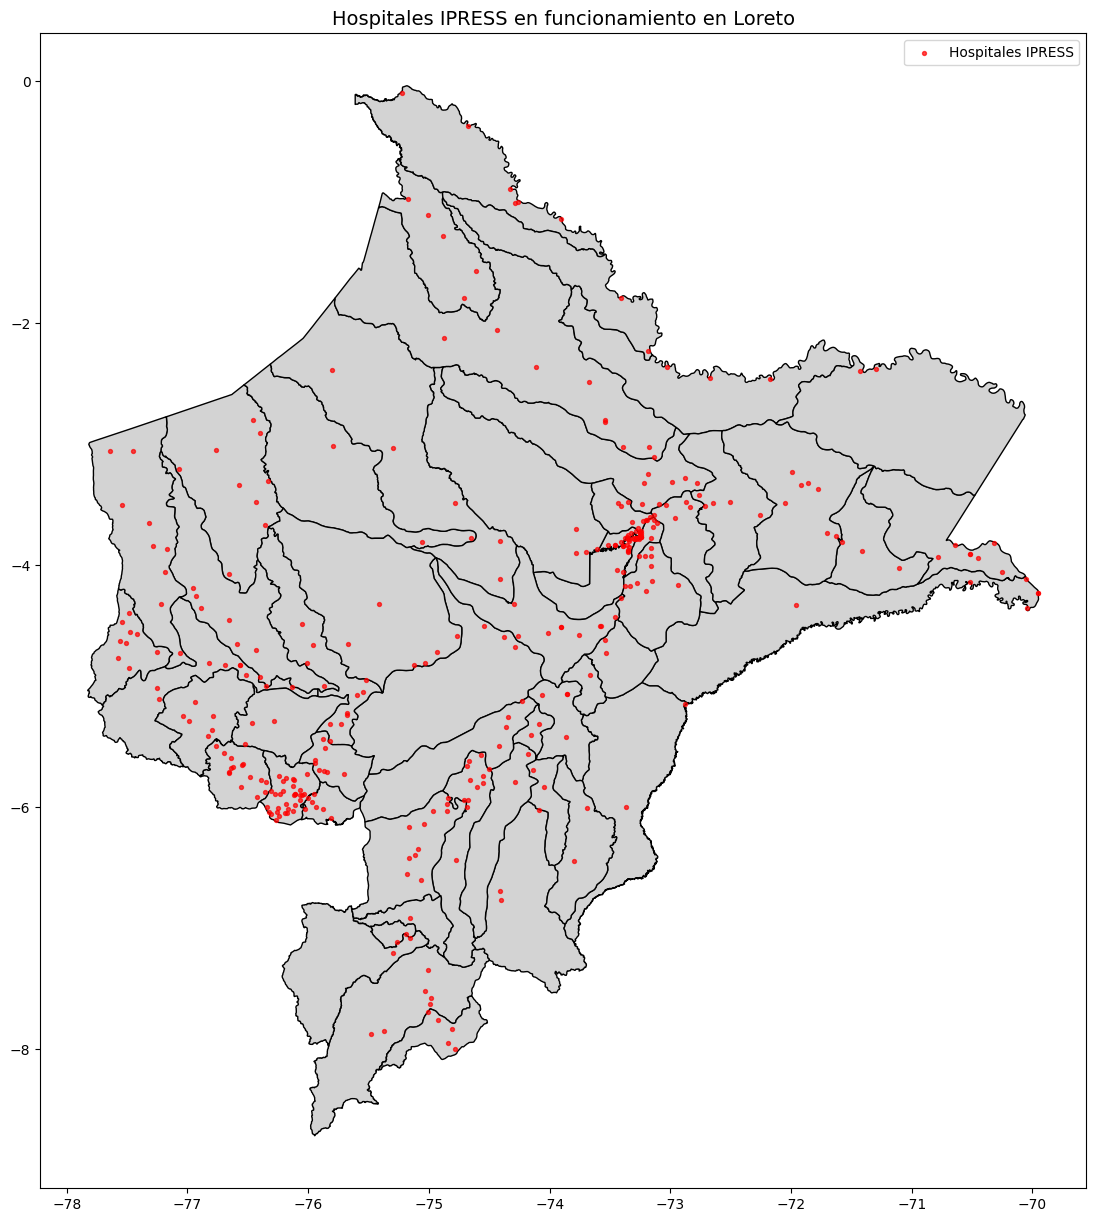

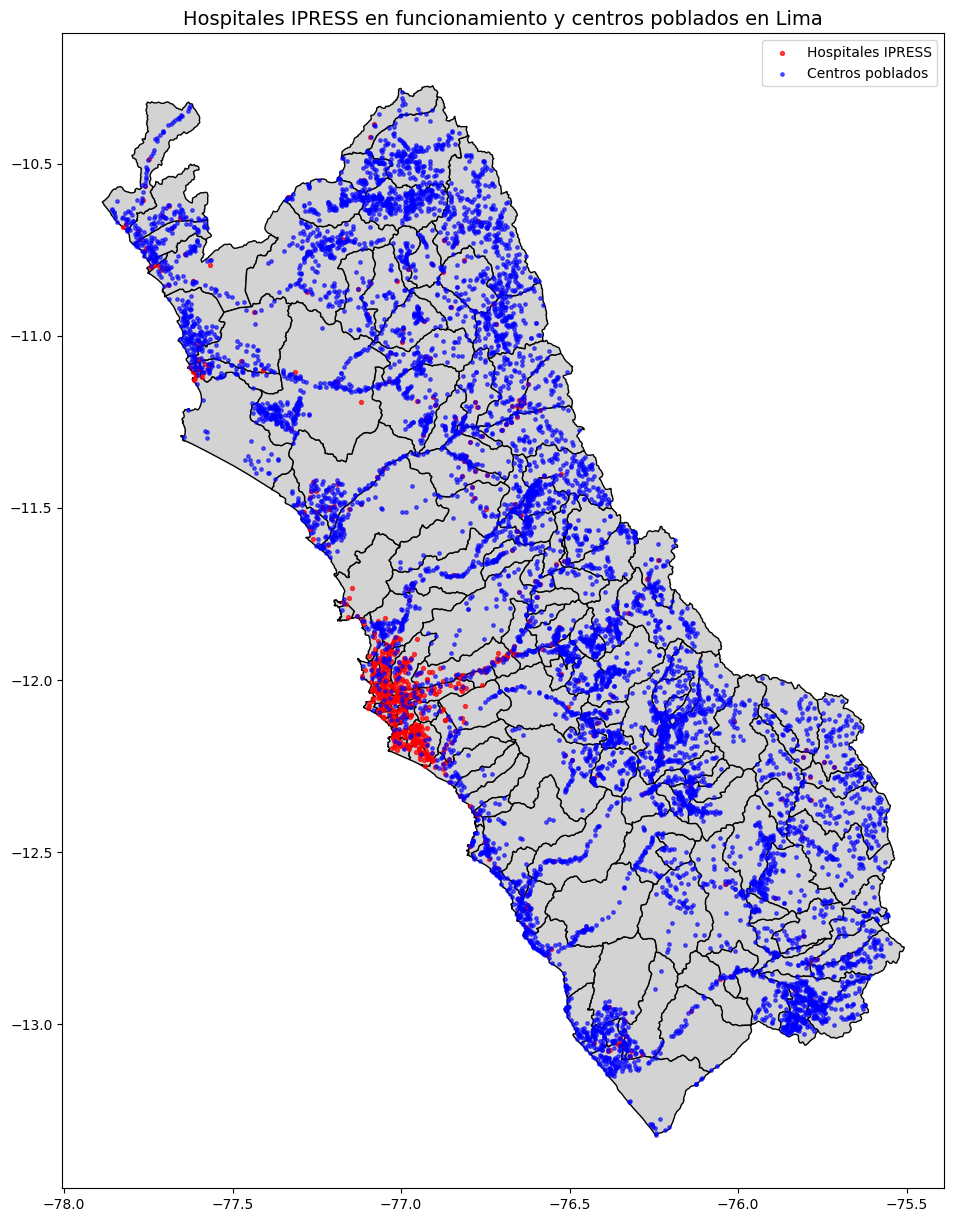

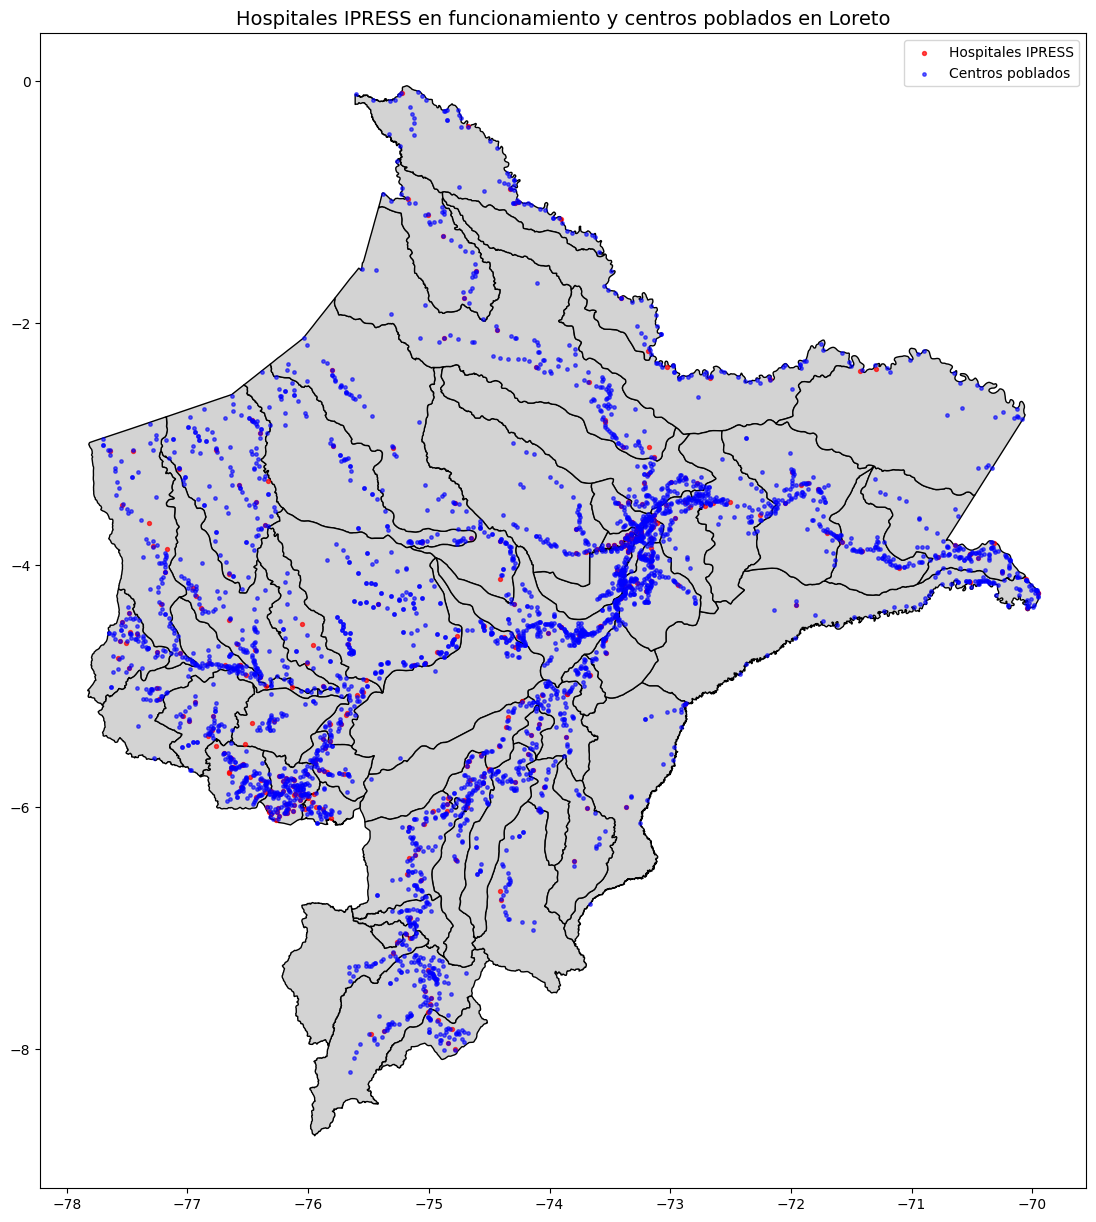


✅ Análisis completado exitosamente!


In [ ]:
# ============================================================================
# Task 3: Proximity Analysis: Geometry centroids
# ============================================================================

# Importar librerías necesarias
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import chardet
from pathlib import Path

# ============================================================================
# 1. CARGAR SHAPE FILE DE DISTRITOS
# ============================================================================

# Subimos el shape file de distritos
districts = gpd.read_file(Path.cwd() / "data" / "shape_file" / "DISTRITOS.shp")
districts = districts.to_crs(epsg=4326)
print(districts.crs)
print(districts)
districts.plot(figsize=(8, 8))
plt.show()

# ============================================================================
# 2. FILTRAR DISTRITOS DE LIMA Y LORETO
# ============================================================================

# Filtrar solo Lima y Loreto
distritos_filtrados = districts[
    districts["DEPARTAMEN"].isin(["LIMA", "LORETO"])
]
distritos_filtrados.plot(figsize=(8, 8))
plt.show()

# Separar Lima y Loreto
lima = districts[districts["DEPARTAMEN"] == "LIMA"]
loreto = districts[districts["DEPARTAMEN"] == "LORETO"]

# Plotear Lima
ax = lima.plot(figsize=(6, 6), color="pink", edgecolor="black")
ax.set_title("Distritos de Lima", fontsize=14)
plt.show()

# Plotear Loreto
ax = loreto.plot(figsize=(6, 6), color="orange", edgecolor="black")
ax.set_title("Distritos de Loreto", fontsize=14)
plt.show()

# ============================================================================
# 3. CARGAR SHAPE FILE DE CENTROS POBLADOS (CENTROIDES)
# ============================================================================

# Upload shape file at population center level
centroids = gpd.read_file(Path.cwd() / "data" / "shape_file" / "CCPP_IGN100K.shp")

# Ensure the centroids dataset is in WGS-84 (EPSG:4326)
centroids = centroids.to_crs(epsg=4326)
print(centroids.crs)
print(centroids)
centroids.plot(figsize=(8, 8))
plt.show()

# ============================================================================
# 4. FILTRAR CENTROIDES POR DEPARTAMENTO
# ============================================================================

# Filtrar centroides de Lima y Loreto usando la columna DEP
centroids_lima = centroids[centroids["DEP"] == "LIMA"]
centroids_loreto = centroids[centroids["DEP"] == "LORETO"]

# Revisar cuántos registros hay en cada uno
print("Centroides en Lima:", len(centroids_lima))
print("Centroides en Loreto:", len(centroids_loreto))

# Plotear centroides de Lima
ax = centroids_lima.plot(figsize=(6, 6), color="pink", markersize=5)
ax.set_title("Centroides de Lima", fontsize=14)
plt.show()

# Plotear centroides de Loreto
ax = centroids_loreto.plot(figsize=(6, 6), color="orange", markersize=5)
ax.set_title("Centroides de Loreto", fontsize=14)
plt.show()

# ============================================================================
# 5. LIMPIAR CENTROIDES DENTRO DE LIMA
# ============================================================================

# Asegurar mismo CRS
centroids = centroids.to_crs(lima.crs)

# Quedarse solo con los centroides dentro de Lima
centroids_lima_clean = gpd.sjoin(
    centroids, lima, how="inner", predicate="within"
)

print(f"Centroides originales: {len(centroids)}")
print(f"Centroides en Lima: {len(centroids_lima_clean)}")

# Plotear Lima + centroides
fig, ax = plt.subplots(figsize=(8, 8))
lima.plot(ax=ax, color="lightgray", edgecolor="black")
centroids_lima_clean.plot(ax=ax, color="pink", markersize=5)
ax.set_title("Centroides centros poblados de Lima", fontsize=14)
plt.show()

# ============================================================================
# 6. LIMPIAR CENTROIDES DENTRO DE LORETO
# ============================================================================

# Nos aseguramos que los centroides estén en el mismo CRS que Loreto
centroids = centroids.to_crs(loreto.crs)

# Filtramos solo los centroides que caen dentro de Loreto
centroids_loreto_clean = gpd.sjoin(centroids, loreto, how="inner", predicate="within")

print(f"Centroides originales: {len(centroids)}")
print(f"Centroides en Loreto: {len(centroids_loreto_clean)}")

# Plotear distritos de Loreto + centroides
fig, ax = plt.subplots(figsize=(8, 8))
loreto.plot(ax=ax, color="lightgray", edgecolor="black")
centroids_loreto_clean.plot(ax=ax, color="orange", markersize=5)
ax.set_title("Centroides centros poblados de Loreto", fontsize=14)
plt.show()

# ============================================================================
# 7. CARGAR Y PROCESAR DATOS DE HOSPITALES (IPRESS)
# ============================================================================

# Cargamos archivo de hospitales
ipress = pd.read_csv(Path.cwd() / "data" / "IPRESS.csv", encoding="latin-1")
print(ipress)

# Filtrar hospitales en funcionamiento y con coordenadas válidas
ipress_filtered = ipress[
    (ipress["Condición"] == "EN FUNCIONAMIENTO") &
    (ipress["NORTE"].notnull()) &
    (ipress["ESTE"].notnull())
].copy()

# Renombrar columnas
ipress_filtered = ipress_filtered.rename(columns={
    "NORTE": "LATITUD",
    "ESTE": "LONGITUD"
})

# Convertir a GeoDataFrame
ipress_gdf = gpd.GeoDataFrame(
    ipress_filtered,
    geometry=gpd.points_from_xy(ipress_filtered["LATITUD"], ipress_filtered["LONGITUD"]),
    crs="EPSG:4326"
)

# ============================================================================
# 8. FILTRAR HOSPITALES POR DEPARTAMENTO
# ============================================================================

# Filtrar solo hospitales de Lima
ipress_lima = ipress_gdf[ipress_gdf["Departamento"] == "LIMA"]

# Filtrar solo hospitales de Loreto
ipress_loreto = ipress_gdf[ipress_gdf["Departamento"] == "LORETO"]

# ============================================================================
# 9. PLOTEAR HOSPITALES POR DEPARTAMENTO
# ============================================================================

# Lista de departamentos y sus GeoDataFrames correspondientes
departamentos = [
    ("Lima", lima, ipress_lima),
    ("Loreto", loreto, ipress_loreto)
]

for nombre, depto_gdf, ipress_gdf in departamentos:
    # Filtrar hospitales dentro del departamento
    ipress_in = gpd.sjoin(ipress_gdf, depto_gdf, predicate="within")
    
    # Plotear
    fig, ax = plt.subplots(figsize=(15, 15))
    depto_gdf.plot(ax=ax, color="lightgray", edgecolor="black")
    ipress_in.plot(ax=ax, color="red", markersize=8, alpha=0.7, label="Hospitales IPRESS")
    
    ax.set_title(f"Hospitales IPRESS en funcionamiento en {nombre}", fontsize=14)
    ax.legend()
    plt.show()

# ============================================================================
# 10. PLOTEAR HOSPITALES Y CENTROS POBLADOS JUNTOS
# ============================================================================

# Lista de departamentos y sus GeoDataFrames correspondientes
departamentos = [
    ("Lima", lima, ipress_lima, centroids_lima_clean),
    ("Loreto", loreto, ipress_loreto, centroids_loreto_clean)
]

for nombre, depto_gdf, ipress_gdf, centroids_gdf in departamentos:
    # Aseguramos que los centroides estén en el mismo CRS que el departamento
    centroids_aligned = centroids_gdf.to_crs(depto_gdf.crs)
    
    # Filtrar solo hospitales dentro del departamento
    ipress_in = gpd.sjoin(ipress_gdf, depto_gdf, predicate="within")
    
    # Plotear
    fig, ax = plt.subplots(figsize=(15, 15))
    
    # Distritos del departamento
    depto_gdf.plot(ax=ax, color="lightgray", edgecolor="black")
    
    # Hospitales IPRESS dentro del departamento
    ipress_in.plot(ax=ax, color="red", markersize=8, alpha=0.7, label="Hospitales IPRESS")
    
    # Centros poblados (centroides)
    centroids_aligned.plot(ax=ax, color="blue", markersize=6, alpha=0.6, label="Centros poblados")
    
    # Título y leyenda
    ax.set_title(f"Hospitales IPRESS en funcionamiento y centros poblados en {nombre}", fontsize=14)
    ax.legend()
    plt.show()

print("\n✅ Análisis completado exitosamente!")


✅ Buffers creados:
   - Lima: 7610 buffers
   - Loreto: 3426 buffers


/var/folders/st/y2z9s8vn727_7444d2hjn0480000gn/T/ipykernel_32752/4229534303.py:79: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  buffer_patch = mpatches.Patch(color="#E8F4F8", alpha=0.4, edgecolor="#2E86C1", label="Buffer 10 km")


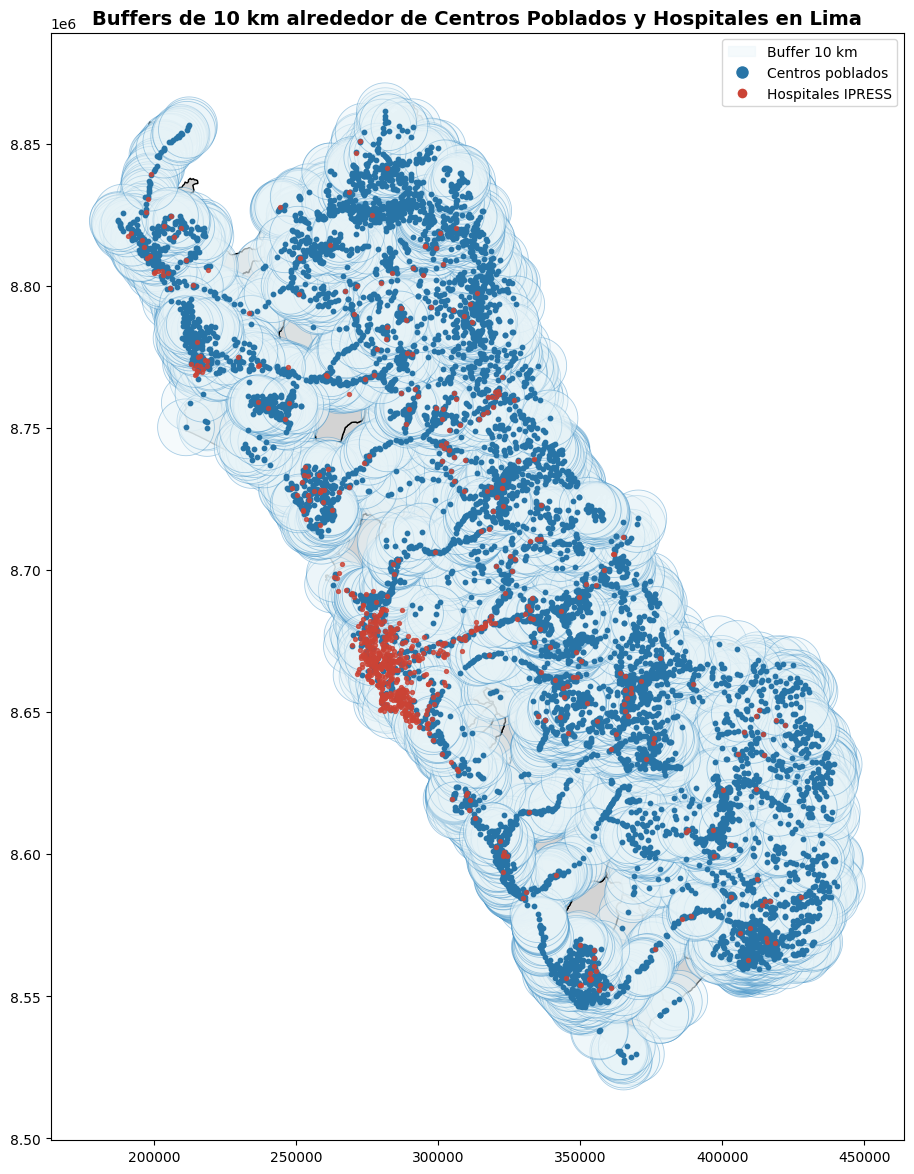

/var/folders/st/y2z9s8vn727_7444d2hjn0480000gn/T/ipykernel_32752/4229534303.py:79: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  buffer_patch = mpatches.Patch(color="#E8F4F8", alpha=0.4, edgecolor="#2E86C1", label="Buffer 10 km")


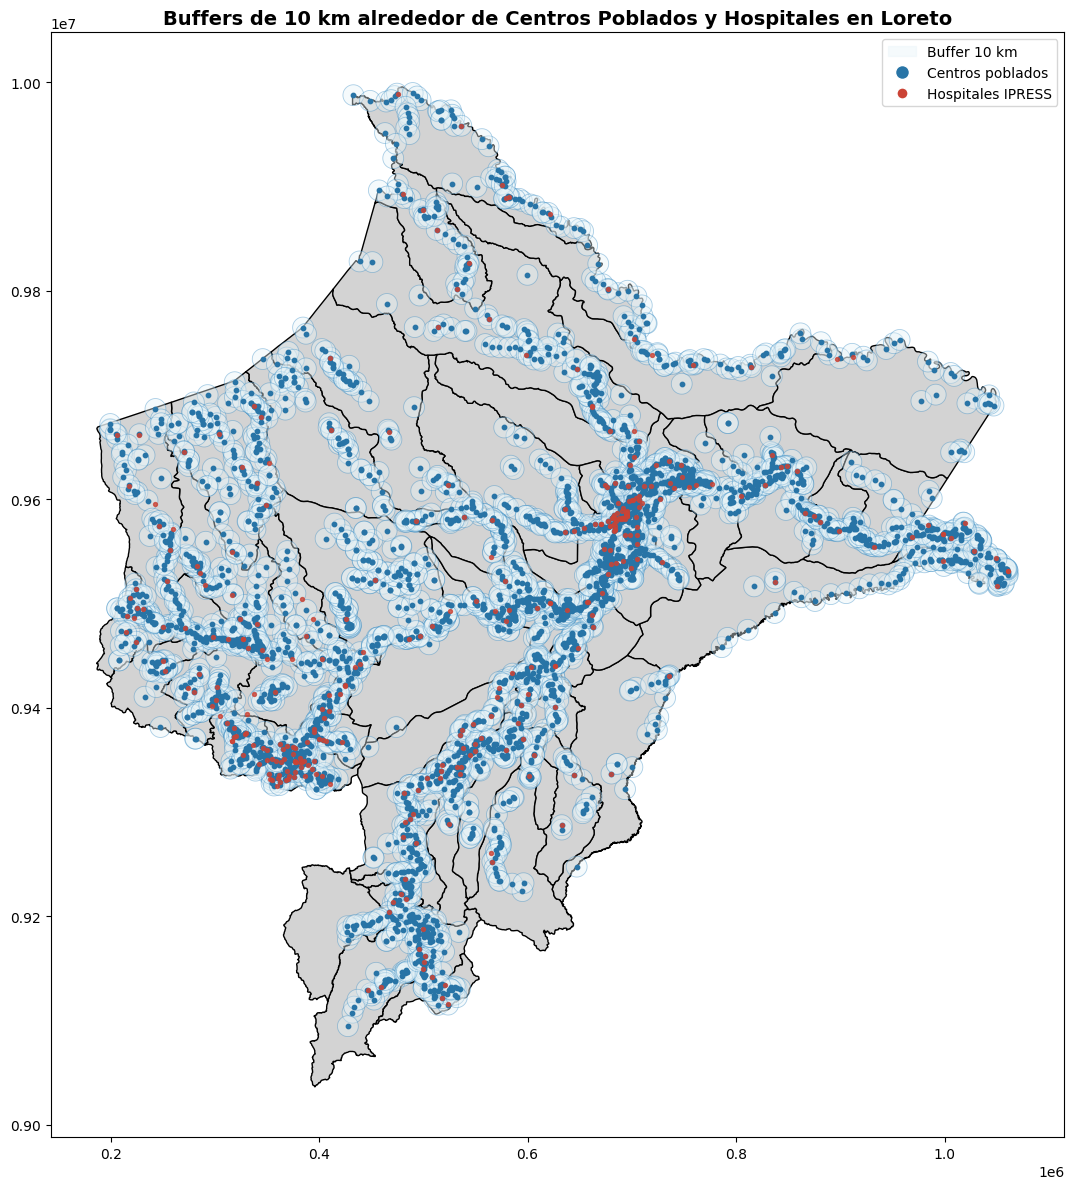


✅ Hospitales proyectados a EPSG:32718 (UTM)


In [17]:
# ============================================================================
# 11. CREAR BUFFERS DE 10 KM ALREDEDOR DE CENTROS POBLADOS
# ============================================================================

# Lista de departamentos y sus centroides correspondientes
departamentos = [
    ("Lima", lima, centroids_lima_clean),
    ("Loreto", loreto, centroids_loreto_clean)
]

# Diccionario para guardar los buffers de cada departamento
buffers_dict = {}

for nombre, depto_gdf, centroids_gdf in departamentos:
    # 1. Asegurar CRS proyectado (metros)
    depto_proj = depto_gdf.to_crs("EPSG:32718")
    centroids_proj = centroids_gdf.to_crs("EPSG:32718")
    
    # 2. Crear buffers de 10 km alrededor de cada centro poblado
    centroids_proj["buffer_10km"] = centroids_proj.buffer(10000)
    
    # 3. Convertir esos buffers en un GeoDataFrame separado
    buffers = centroids_proj.set_geometry("buffer_10km")
    
    # Guardar en el diccionario
    buffers_dict[nombre] = buffers

# Acceso a los buffers de Lima y Loreto
buffers_lima = buffers_dict["Lima"]
buffers_loreto = buffers_dict["Loreto"]

print(f"\n✅ Buffers creados:")
print(f"   - Lima: {len(buffers_lima)} buffers")
print(f"   - Loreto: {len(buffers_loreto)} buffers")

# ============================================================================
# 12. VISUALIZAR BUFFERS, CENTROS POBLADOS Y HOSPITALES
# ============================================================================

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# Lista de departamentos y sus GeoDataFrames
departamentos = [
    ("Lima", lima, ipress_lima, centroids_lima_clean),
    ("Loreto", loreto, ipress_loreto, centroids_loreto_clean)
]

for nombre, depto_gdf, ipress_gdf, centroids_gdf in departamentos:
    
    # 1. Filtrar hospitales dentro del departamento
    ipress_in = gpd.sjoin(ipress_gdf, depto_gdf, predicate="within")
    
    # 2. Asegurar CRS proyectado (metros)
    depto_proj = depto_gdf.to_crs("EPSG:32718")
    ipress_proj = ipress_in.to_crs("EPSG:32718")
    centroids_proj = centroids_gdf.to_crs("EPSG:32718")
    
    # 3. Crear buffers de 10 km alrededor de cada centro poblado
    centroids_proj["buffer_10km"] = centroids_proj.buffer(10000)
    buffers_gdf = centroids_proj.set_geometry("buffer_10km")
    
    # 4. Plotear
    fig, ax = plt.subplots(figsize=(12, 12))
    
    # Distritos / departamento
    depto_proj.plot(ax=ax, color="lightgray", edgecolor="black")
    
    # Buffers
    buffers_gdf.plot(ax=ax, color="#E8F4F8", alpha=0.4, edgecolor="#2E86C1", linewidth=0.6)
    
    # Centroides en azul
    centroids_proj.plot(ax=ax, color="#2874A6", markersize=10, label="Centros poblados", zorder=3)
    
    # Hospitales en rojo
    ipress_proj.plot(ax=ax, color="#CB4335", markersize=8, alpha=0.8, label="Hospitales IPRESS", zorder=4)
    
    # 5. Leyenda completa
    buffer_patch = mpatches.Patch(color="#E8F4F8", alpha=0.4, edgecolor="#2E86C1", label="Buffer 10 km")
    centroid_marker = Line2D([0], [0], marker='o', color='w', markerfacecolor='#2874A6', markersize=10, label='Centros poblados')
    hospital_marker = Line2D([0], [0], marker='o', color='w', markerfacecolor='#CB4335', markersize=8, label='Hospitales IPRESS')
    
    ax.legend(handles=[buffer_patch, centroid_marker, hospital_marker], loc="upper right", fontsize=10)
    
    ax.set_title(f"Buffers de 10 km alrededor de Centros Poblados y Hospitales en {nombre}", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# ============================================================================
# 13. FILTRAR HOSPITALES DENTRO DE BUFFERS
# ============================================================================

# 1. Filtrar hospitales dentro de Lima y Loreto
ipress_lima_in = gpd.sjoin(ipress_lima, lima, predicate="within")
ipress_loreto_in = gpd.sjoin(ipress_loreto, loreto, predicate="within")

# 2. Proyectar al CRS UTM (metros) para poder trabajar con buffers
ipress_lima_in_proj = ipress_lima_in.to_crs("EPSG:32718") 
ipress_loreto_in_proj = ipress_loreto_in.to_crs("EPSG:32718")

print("\n✅ Hospitales proyectados a EPSG:32718 (UTM)")


In [20]:
# ============================================================================
# 14. IDENTIFICAR HOSPITALES DENTRO DE CADA BUFFER
# ============================================================================

print("\n🔍 Preparando datos para análisis de proximidad...")

# 1. Filtrar hospitales dentro de Lima y Loreto Y LIMPIAR COLUMNAS
ipress_lima_in = gpd.sjoin(ipress_lima, lima, predicate="within")
ipress_loreto_in = gpd.sjoin(ipress_loreto, loreto, predicate="within")

# IMPORTANTE: Eliminar columnas de joins anteriores
columnas_a_eliminar = ['index_right', 'index_left', 'index_right_buffer', 'index_left_buffer']
for col in columnas_a_eliminar:
    if col in ipress_lima_in.columns:
        ipress_lima_in = ipress_lima_in.drop(columns=[col])
    if col in ipress_loreto_in.columns:
        ipress_loreto_in = ipress_loreto_in.drop(columns=[col])

# 2. Proyectar al CRS UTM (metros) para poder trabajar con buffers
ipress_lima_in_proj = ipress_lima_in.to_crs("EPSG:32718") 
ipress_loreto_in_proj = ipress_loreto_in.to_crs("EPSG:32718")

print("✅ Hospitales proyectados a EPSG:32718 (UTM)")
print(f"   - Lima: {len(ipress_lima_in_proj)} hospitales")
print(f"   - Loreto: {len(ipress_loreto_in_proj)} hospitales")

# Lista de departamentos con sus hospitales proyectados y buffers
departamentos = [
    ("Lima", ipress_lima_in_proj, buffers_lima),
    ("Loreto", ipress_loreto_in_proj, buffers_loreto)
]

# Diccionario para guardar resultados
hospitals_in_buffers_dict = {}

print("\n🔄 Identificando hospitales dentro de buffers de 10 km...")

for nombre, ipress_proj, buffers_gdf in departamentos:
    # Asegurar que ambos GeoDataFrames están en el mismo CRS
    ipress_proj = ipress_proj.to_crs("EPSG:32718")
    buffers_gdf = buffers_gdf.to_crs("EPSG:32718")
    
    # CRÍTICO: Limpiar AMBOS GeoDataFrames de columnas previas de joins
    columnas_a_eliminar = ['index_right', 'index_left', 'index_right_buffer', 'index_left_buffer']
    
    # Limpiar hospitales
    for col in columnas_a_eliminar:
        if col in ipress_proj.columns:
            ipress_proj = ipress_proj.drop(columns=[col])
    
    # Limpiar buffers (ESTO ES LO QUE FALTABA)
    for col in columnas_a_eliminar:
        if col in buffers_gdf.columns:
            buffers_gdf = buffers_gdf.drop(columns=[col])
    
    # Verificar columnas antes del join
    print(f"\n[DEBUG {nombre}] Columnas en hospitales: {list(ipress_proj.columns)[:5]}...")
    print(f"[DEBUG {nombre}] Columnas en buffers: {list(buffers_gdf.columns)[:5]}...")
    
    # Unir hospitales con buffers
    hospitals_in_buffers = gpd.sjoin(
        ipress_proj,       # hospitales (puntos)
        buffers_gdf,       # buffers de 10 km (polígonos)
        how="inner",       # solo los que están dentro
        predicate="within"
    )
    
    # Guardar resultado en el diccionario
    hospitals_in_buffers_dict[nombre] = hospitals_in_buffers
    
    print(f"   ✅ {nombre}: {len(hospitals_in_buffers)} hospitales dentro de buffers")

print("\n✅ Hospitales identificados dentro de buffers")

# ============================================================================
# 15. IDENTIFICAR CENTROS POBLADOS CON MÁS Y MENOS HOSPITALES
# ============================================================================

# Diccionario para guardar resultados por departamento
hospitals_stats_per_depto = {}

print("\n" + "="*70)
print("ANÁLISIS: CENTROS POBLADOS CON MÁS Y MENOS HOSPITALES CERCANOS")
print("="*70)

for nombre in hospitals_in_buffers_dict:
    hospitals_in_buffers = hospitals_in_buffers_dict[nombre]
    
    # Verificar si hay datos
    if len(hospitals_in_buffers) == 0:
        print(f"\n⚠️ [{nombre}] No hay hospitales dentro de ningún buffer.")
        print(f"   Esto puede deberse a:")
        print(f"   - Coordenadas incorrectas o invertidas en los datos")
        print(f"   - Hospitales fuera del radio de 10 km de centros poblados")
        print(f"   - Problemas con la proyección CRS")
        continue
    
    # La columna correcta después del sjoin es 'index_right'
    buffer_col = 'index_right'
    
    print(f"\n[{nombre}] Total hospitales en buffers: {len(hospitals_in_buffers)}")
    
    # Filtrar solo registros válidos
    hospitals_valid = hospitals_in_buffers[hospitals_in_buffers[buffer_col].notna()].copy()
    
    if len(hospitals_valid) == 0:
        print(f"\n⚠️ [{nombre}] No hay hospitales válidos dentro de buffers.")
        continue
    
    # Contar hospitales por buffer
    hospital_counts = hospitals_valid.groupby(buffer_col).size()
    
    print(f"   📊 Buffers con hospitales: {len(hospital_counts)}")
    print(f"   📊 Rango: {hospital_counts.min()} - {hospital_counts.max()} hospitales por buffer")
    
    # Buffer con más hospitales (concentración)
    max_buffer_id = hospital_counts.idxmax()
    max_buffer_count = hospital_counts.max()
    
    # Buffer con menos hospitales (aislamiento) - que tenga al menos 1
    min_buffer_id = hospital_counts.idxmin()
    min_buffer_count = hospital_counts.min()
    
    # Seleccionar buffers correctos
    buffers_gdf = buffers_lima if nombre == "Lima" else buffers_loreto
    
    # Verificar que los IDs existen en el GeoDataFrame de buffers
    if max_buffer_id not in buffers_gdf.index:
        print(f"\n⚠️ [{nombre}] Error: ID de buffer MAX ({max_buffer_id}) no encontrado")
        continue
    if min_buffer_id not in buffers_gdf.index:
        print(f"\n⚠️ [{nombre}] Error: ID de buffer MIN ({min_buffer_id}) no encontrado")
        continue
    
    # Extraer info de los buffers
    nom_poblad_max = buffers_gdf.loc[max_buffer_id, "NOM_POBLAD"]
    codccpp_max = buffers_gdf.loc[max_buffer_id, "CÓDIGO"]
    
    nom_poblad_min = buffers_gdf.loc[min_buffer_id, "NOM_POBLAD"]
    codccpp_min = buffers_gdf.loc[min_buffer_id, "CÓDIGO"]
    
    # Guardar resultados
    hospitals_stats_per_depto[nombre] = {
        "max": {
            "buffer_id": max_buffer_id,
            "count": max_buffer_count,
            "nom_poblad": nom_poblad_max,
            "codccpp": codccpp_max
        },
        "min": {
            "buffer_id": min_buffer_id,
            "count": min_buffer_count,
            "nom_poblad": nom_poblad_min,
            "codccpp": codccpp_min
        },
        "buffer_col": buffer_col  # Guardar el nombre de la columna
    }
    
    # Imprimir resultados
    print(f"\n📍 {nombre.upper()}")
    print(f"   🔴 MAYOR CONCENTRACIÓN: '{nom_poblad_max}' (Código: {codccpp_max})")
    print(f"      → {max_buffer_count} hospitales dentro del buffer de 10 km")
    print(f"   🟠 MAYOR AISLAMIENTO: '{nom_poblad_min}' (Código: {codccpp_min})")
    print(f"      → {min_buffer_count} hospital(es) dentro del buffer de 10 km")

print("\n" + "="*70)


🔍 Preparando datos para análisis de proximidad...
✅ Hospitales proyectados a EPSG:32718 (UTM)
   - Lima: 772 hospitales
   - Loreto: 350 hospitales

🔄 Identificando hospitales dentro de buffers de 10 km...

[DEBUG Lima] Columnas en hospitales: ['Institución', 'Código Único', 'Nombre del establecimiento', 'Clasificación', 'Tipo']...
[DEBUG Lima] Columnas en buffers: ['OBJECTID', 'NOM_POBLAD', 'FUENTE_left', 'CÓDIGO', 'CAT_POBLAD']...
   ✅ Lima: 51721 hospitales dentro de buffers

[DEBUG Loreto] Columnas en hospitales: ['Institución', 'Código Único', 'Nombre del establecimiento', 'Clasificación', 'Tipo']...
[DEBUG Loreto] Columnas en buffers: ['OBJECTID', 'NOM_POBLAD', 'FUENTE_left', 'CÓDIGO', 'CAT_POBLAD']...
   ✅ Loreto: 6043 hospitales dentro de buffers

✅ Hospitales identificados dentro de buffers

ANÁLISIS: CENTROS POBLADOS CON MÁS Y MENOS HOSPITALES CERCANOS

[Lima] Total hospitales en buffers: 51721
   📊 Buffers con hospitales: 6673
   📊 Rango: 1 - 223 hospitales por buffer

📍 LI

In [21]:
# ============================================================================
# 16. VISUALIZACIÓN INTERACTIVA CON FOLIUM
# ============================================================================

import folium

# Verificar que hay datos para visualizar
if len(hospitals_stats_per_depto) == 0:
    print("\n⚠️ No hay datos para generar mapas. Verifica que los hospitales estén correctamente georeferenciados.")
else:
    print("\n🗺️ Generando mapas interactivos con Folium...")
    
    mapas_dict = {}
    
    for depto in hospitals_stats_per_depto.keys():
        stats = hospitals_stats_per_depto[depto]
        buffer_col = stats["buffer_col"]
        
        print(f"\n   📍 Procesando mapa de {depto}...")
        
        # Centroides para calcular centro aproximado del mapa
        centroids = []
        for tipo in ["max", "min"]:
            buffer_id = stats[tipo]["buffer_id"]
            buffers_gdf = buffers_lima if depto == "Lima" else buffers_loreto
            
            # Limpiar columnas problemáticas antes de proyectar
            buffers_temp = buffers_gdf.copy()
            for col in ['index_right', 'index_left']:
                if col in buffers_temp.columns:
                    buffers_temp = buffers_temp.drop(columns=[col])
            
            buffer_proj = buffers_temp.loc[[buffer_id]].to_crs(epsg=32718)
            centroids.append(buffer_proj.centroid.iloc[0])
        
        # Centro promedio para centrar el mapa
        x_mean = sum([pt.x for pt in centroids]) / 2
        y_mean = sum([pt.y for pt in centroids]) / 2
        centroid_point = gpd.GeoSeries([gpd.points_from_xy([x_mean], [y_mean])[0]], crs="EPSG:32718").to_crs(epsg=4326).iloc[0]
    
        # Crear mapa base
        m = folium.Map(
            location=[centroid_point.y, centroid_point.x], 
            zoom_start=11,
            tiles='CartoDB positron'
        )
        
        # Colores para máximo y mínimo
        colors = {"max": "red", "min": "orange"}
        buffer_colors = {"max": "#3498DB", "min": "#9B59B6"}
        labels = {"max": "🏆 MAYOR CONCENTRACIÓN", "min": "⚠️ MAYOR AISLAMIENTO"}
        
        for tipo in ["max", "min"]:
            info = stats[tipo]
            buffers_gdf_original = buffers_lima if depto == "Lima" else buffers_loreto
            
            # Limpiar buffer antes de usar
            buffers_gdf = buffers_gdf_original.copy()
            for col in ['index_right', 'index_left']:
                if col in buffers_gdf.columns:
                    buffers_gdf = buffers_gdf.drop(columns=[col])
            
            # Buffer y hospitales dentro
            buffer_gdf = buffers_gdf.loc[[info["buffer_id"]]]
            hospitals_in_buffer = hospitals_in_buffers_dict[depto]
            hospitals_in_buffer = hospitals_in_buffer[hospitals_in_buffer[buffer_col] == info["buffer_id"]]
            
            # Convertir a WGS84
            buffer_wgs84 = buffer_gdf.to_crs(epsg=4326)
            centroid_proj = buffer_gdf.to_crs(epsg=32718).centroid.iloc[0]
            centroid_point_tipo = gpd.GeoSeries([centroid_proj], crs="EPSG:32718").to_crs(epsg=4326).iloc[0]
            
            # Limpiar hospitales antes de proyectar
            hospitals_temp = hospitals_in_buffer.copy()
            for col in ['index_right', 'index_left']:
                if col in hospitals_temp.columns:
                    hospitals_temp = hospitals_temp.drop(columns=[col])
            
            hospitals_wgs84 = hospitals_temp.to_crs(epsg=4326)
            
            # Agregar buffer (círculo de 10 km)
            folium.Circle(
                location=[centroid_point_tipo.y, centroid_point_tipo.x],
                radius=10000,
                color=buffer_colors[tipo],
                fill=True,
                fill_opacity=0.15,
                weight=2,
                popup=folium.Popup(
                    f"<b>Buffer 10 km - {labels[tipo]}</b><br>"
                    f"<b>Centro Poblado:</b> {info['nom_poblad']}<br>"
                    f"<b>Código:</b> {info['codccpp']}<br>"
                    f"<b>Hospitales:</b> {info['count']}",
                    max_width=300
                )
            ).add_to(m)
            
            # Agregar centro poblado (marcador estrella)
            folium.Marker(
                location=[centroid_point_tipo.y, centroid_point_tipo.x],
                icon=folium.Icon(color=colors[tipo], icon="star", prefix='fa'),
                popup=folium.Popup(
                    f"<div style='font-size: 14px;'>"
                    f"<b>{labels[tipo]}</b><br>"
                    f"<b>Centro Poblado:</b> {info['nom_poblad']}<br>"
                    f"<b>Código:</b> {info['codccpp']}<br>"
                    f"<b>Hospitales cercanos:</b> {info['count']}<br>"
                    f"<i>{'Zona con mayor acceso a servicios de salud' if tipo == 'max' else 'Zona con acceso limitado a servicios de salud'}</i>"
                    f"</div>",
                    max_width=350
                ),
                tooltip=f"{info['nom_poblad']} - {info['count']} hospitales"
            ).add_to(m)
            
            # Agregar hospitales dentro del buffer
            print(f"      → Agregando {len(hospitals_wgs84)} hospitales para {tipo}...")
            for idx, row in hospitals_wgs84.iterrows():
                nombre = row.get("Nombre del establecimiento", "Desconocido")
                codigo = row.get("Código Único", "N/A")
                categoria = row.get("Categoría", "N/A")
                
                folium.CircleMarker(
                    location=[row.geometry.y, row.geometry.x],
                    radius=5,
                    color="#E74C3C",
                    fill=True,
                    fill_color="#E74C3C",
                    fill_opacity=0.7,
                    weight=2,
                    tooltip=folium.Tooltip(f"<b>{nombre}</b>", sticky=True),
                    popup=folium.Popup(
                        f"<div style='font-size: 12px;'>"
                        f"<b>🏥 {nombre}</b><br>"
                        f"<b>Código:</b> {codigo}<br>"
                        f"<b>Categoría:</b> {categoria}"
                        f"</div>",
                        max_width=250
                    )
                ).add_to(m)
        
        # Agregar título al mapa
        title_html = f'''
        <div style="position: fixed; 
                    top: 10px; left: 50px; width: 550px; height: 80px; 
                    background-color: white; border:2px solid grey; z-index:9999; 
                    font-size:16px; padding: 10px; border-radius: 5px;
                    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);">
        <b style="font-size: 18px;">Análisis de Proximidad Hospitalaria - {depto}</b><br>
        <span style="font-size:12px;">
        <span style="color: #E74C3C;">●</span> Hospitales IPRESS | 
        <span style="color: #3498DB;">🔵</span> Mayor concentración | 
        <span style="color: #9B59B6;">🟣</span> Mayor aislamiento
        </span><br>
        <span style="font-size:11px; color: #555;">
        Buffers de 10 km alrededor de centros poblados
        </span>
        </div>
        '''
        m.get_root().html.add_child(folium.Element(title_html))
        
        # Agregar leyenda
        legend_html = '''
        <div style="position: fixed; 
                    bottom: 50px; left: 50px; width: 200px; 
                    background-color: white; border:2px solid grey; z-index:9999; 
                    font-size:12px; padding: 10px; border-radius: 5px;
                    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);">
        <p style="margin: 0; font-weight: bold;">Leyenda</p>
        <p style="margin: 5px 0;"><span style="color: #E74C3C;">⬤</span> Hospital IPRESS</p>
        <p style="margin: 5px 0;"><span style="color: red;">⭐</span> Mayor concentración</p>
        <p style="margin: 5px 0;"><span style="color: orange;">⭐</span> Mayor aislamiento</p>
        <p style="margin: 5px 0;"><span style="color: #3498DB;">○</span> Buffer 10 km (máx)</p>
        <p style="margin: 5px 0;"><span style="color: #9B59B6;">○</span> Buffer 10 km (mín)</p>
        </div>
        '''
        m.get_root().html.add_child(folium.Element(legend_html))
        
        # Guardar mapa en diccionario
        mapas_dict[depto] = m
        
        print(f"   ✅ Mapa de {depto} generado exitosamente")
    
    # ============================================================================
    # 17. GUARDAR MAPAS INTERACTIVOS
    # ============================================================================
    
    # Ruta relativa para outputs
    output_dir = Path.cwd() / "outputs"
    
    # Crear carpeta si no existe
    output_dir.mkdir(parents=True, exist_ok=True)
    
    print("\n💾 Guardando mapas interactivos...")
    
    # Guardar cada mapa en esa carpeta
    for depto, mapa in mapas_dict.items():
        output_path = output_dir / f"{depto}_hospitales_buffer_analysis.html"
        mapa.save(str(output_path))
        print(f"   ✅ {depto}: {output_path}")
    
    print("\n" + "="*70)
    print("🎉 ANÁLISIS COMPLETADO EXITOSAMENTE")
    print("="*70)
    print(f"📂 Los mapas interactivos se han guardado en: {output_dir}")
    print("\n📋 Resumen del análisis:")
    for depto in hospitals_stats_per_depto.keys():
        stats = hospitals_stats_per_depto[depto]
        print(f"\n   {depto}:")
        print(f"   • Mayor concentración: {stats['max']['nom_poblad']} ({stats['max']['count']} hospitales)")
        print(f"   • Mayor aislamiento: {stats['min']['nom_poblad']} ({stats['min']['count']} hospital(es))")
    print("="*70)


🗺️ Generando mapas interactivos con Folium...

   📍 Procesando mapa de Lima...
      → Agregando 223 hospitales para max...
      → Agregando 1 hospitales para min...
   ✅ Mapa de Lima generado exitosamente

   📍 Procesando mapa de Loreto...
      → Agregando 29 hospitales para max...
      → Agregando 1 hospitales para min...
   ✅ Mapa de Loreto generado exitosamente

💾 Guardando mapas interactivos...
   ✅ Lima: /Users/valentinalinares/Documents/GitHub/Hospitals-Access-Peru/outputs/Lima_hospitales_buffer_analysis.html
   ✅ Loreto: /Users/valentinalinares/Documents/GitHub/Hospitals-Access-Peru/outputs/Loreto_hospitales_buffer_analysis.html

🎉 ANÁLISIS COMPLETADO EXITOSAMENTE
📂 Los mapas interactivos se han guardado en: /Users/valentinalinares/Documents/GitHub/Hospitals-Access-Peru/outputs

📋 Resumen del análisis:

   Lima:
   • Mayor concentración: SAN BORJA (223 hospitales)
   • Mayor aislamiento: SIGNO PAMPA (1 hospital(es))

   Loreto:
   • Mayor concentración: TRES DE OCTUBRE (29 